<a href="https://colab.research.google.com/github/Balgem/CodingDojo-DataScience/blob/main/Proyecto_2_Cristian_Gorup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuente: https://www.kaggle.com/competitions/spaceship-titanic/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

In [3]:
filename = '/content/drive/My Drive/Codificación_de_Dojo/Kaggle_space_titanic/test.csv'
test  = pd.read_csv(filename)
filename = '/content/drive/My Drive/Codificación_de_Dojo/Kaggle_space_titanic/train.csv'
train  = pd.read_csv(filename)

In [4]:
test.duplicated().sum()

0

In [5]:
train.duplicated().sum()

0

In [6]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

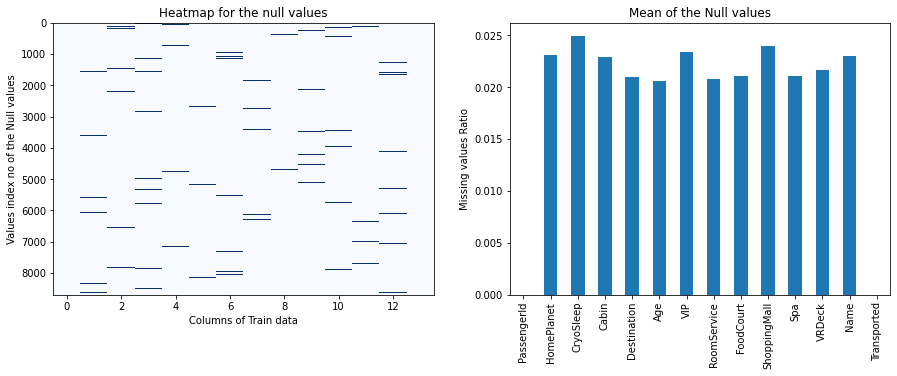

In [8]:
plt.subplots(1,2,figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(train.isnull(),interpolation="nearest", cmap="Blues",aspect="auto",)# vmin=0, vmax=1,cmap="Blues")
plt.xlabel("Columns of Train data")
plt.ylabel("Values index no of the Null values")
plt.title("Heatmap for the null values")

plt.subplot(1,2,2)
train.isnull().mean().plot(kind="bar", title="Mean of the Null values", ylabel="Missing values Ratio")
plt.show()

In [9]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [24]:
train.dropna(inplace=True)

In [25]:
test.dropna(inplace=True)

# Preprocesamiento de datos

In [26]:
test['Transported'] = 0

In [27]:
X_train = train.drop(columns = 'Transported', axis=1)
y_train = train['Transported']
X_test = test.drop(columns = 'Transported', axis=1)
y_test = test['Transported']

In [28]:
cat_selector = make_column_selector(dtype_include='object')
num_selector_int = make_column_selector(dtype_include='int')
num_selector_float = make_column_selector(dtype_include='float')

In [29]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [30]:
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [31]:
scaler = StandardScaler()

In [32]:
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [33]:
number_tuple_int = (numeric_pipe, num_selector_int)
number_tuple_float = (numeric_pipe, num_selector_float)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple_int, number_tuple_float, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f287d51e160>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2897175d00>),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f287d51e2e0>)])

In [34]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f287d51e160>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2897175d00>),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f287d51e2e0>)])

In [35]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [36]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
print('shape of data is', X_test_processed.shape)

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6606, 18517)


shape of data is (3281, 18517)


## Modelos

### Regresión Lineal

In [37]:
reg = LinearRegression()

In [38]:
reg.fit(X_train_processed,y_train)

LinearRegression()

In [39]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

1.0


In [40]:
train_preds_reg = reg.predict(X_train_processed)
test_preds_reg = reg.predict(X_test_processed)

In [41]:
r2_train = r2_score(y_train, train_preds_reg)
r2_test = r2_score(y_test, test_preds_reg)

In [45]:
print('R^2 train es:', r2_train)
print('\n')
print('R^2 test es:', r2_test)

R^2 train es: 1.0


R^2 test es: 0.0


In [43]:
mae_train = mean_absolute_error(y_train, train_preds_reg)
mae_test = mean_absolute_error(y_test, test_preds_reg)

In [44]:
print('MAE train es:', mae_train)
print('\n')
print('MAE test es:', mae_test)

MAE train es: 1.4006624769769897e-14


MAE test es: 0.5171347823548873


In [46]:
mse_train = mean_squared_error(y_train, train_preds_reg)
mse_test = mean_squared_error(y_test, test_preds_reg)

In [47]:
print('MSE train es:', mse_train)
print('\n')
print('MSE test es:', mse_test)

MSE train es: 6.358664802215763e-28


MSE test es: 0.3416401917254068


In [48]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds_reg))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds_reg))

In [49]:
print('RMSE train es:', rmse_train)
print('\n')
print('RMSE test es:', rmse_test)

RMSE train es: 2.5216393085086065e-14


RMSE test es: 0.5844999501500465


In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train_processed))
results = model.fit()
print(results.summary())

### Árboles de decisión

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree.fit(X_train_processed, y_train)

In [ ]:
train_preds_tree = dec_tree.predict(X_train_processed)
test_preds_tree = dec_tree.predict(X_test_processed)

In [ ]:
train_score_tree = dec_tree.score(X_train_processed, y_train)
test_score_tree = dec_tree.score(X_test_processed, y_test)
print(train_score_tree)
print(test_score_tree)

#### Ajustando Modelo

In [ ]:
dec_tree.get_params()

In [ ]:
dec_tree.get_depth()

In [ ]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 1, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

In [ ]:
# Buscamos cual es la mejor 
max_depth_range = list(range(1, 4))

r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

### Bagged Tree

In [ ]:
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
bagreg.fit(X_train_processed, y_train)

In [ ]:
bagreg.predict(X_test_processed)

In [ ]:
bagreg_train_score = bagreg.score(X_train_processed, y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

### Random Forest

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rf.get_params()

In [ ]:
rf.fit(X_train_processed, y_train)

In [ ]:
rf.predict(X_test_processed)

In [ ]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

### Desicion Tree Classifier

In [ ]:
dec_tree_2 = DecisionTreeClassifier(random_state = 42, max_depth=3)

In [ ]:
dec_tree_2.get_params()

In [ ]:
dec_tree_2.fit(X_train_processed, y_train)

In [ ]:
dec_tree_2.predict(X_test_processed)

In [ ]:
train_score_2 = dec_tree_2.score(X_train_processed, y_train)
test_score_2 = dec_tree_2.score(X_test_processed, y_test)
print(train_score_2)
print(test_score_2)

### K Vecinos

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.get_params()

In [ ]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

In [ ]:
predictions = knn_pipe.predict(X_test_processed)
predictions

In [ ]:
acc_score = knn_pipe.score(X_test_processed, y_test)
acc_score

### Regresión Logistica

In [ ]:
logreg = LogisticRegression(C = 32)
logreg_pipe = make_pipeline(scaler, logreg) 
logreg_pipe.fit(X_train_processed,y_train)

In [ ]:
logreg.score(X_train_processed,y_train)